In [84]:
import pandas as pd
import numpy as np
import requests
import io
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



%matplotlib inline



In [85]:
#Define function for getting data frame from MTA url

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

df = get_data([180630, 180623])

In [47]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066


In [48]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [86]:
#Strip column names
df.rename(columns={column:column.strip() for column in df.columns}, inplace=True)
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [50]:
len(df['STATION'].unique())

377

In [87]:
df['ENTRIES_COUNT'] = df.ENTRIES.diff()
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0


In [88]:
df['EXITS_COUNT'] = df.EXITS.diff()
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0


In [53]:
#Check to not drop other null values
df.isnull().sum()

C/A              0
UNIT             0
SCP              0
STATION          0
LINENAME         0
DIVISION         0
DATE             0
TIME             0
DESC             0
ENTRIES          0
EXITS            0
ENTRIES_COUNT    1
EXITS_COUNT      1
dtype: int64

In [89]:
#Drop the null values introduced by count
df.dropna(inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0


In [12]:
#Entries count whacky
df.sort_values('ENTRIES_COUNT')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT
53009,N078,R175,01-03-01,14 ST,ACEL,IND,06/23/2018,01:00:00,REGULAR,12593022,14885474,-2.117260e+09,-1.141564e+09
125128,R116,R030,00-00-03,CHAMBERS ST,123,IRT,06/23/2018,00:00:00,REGULAR,99259,70379,-2.115421e+09,-1.712442e+09
87272,N400A,R359,02-00-04,COURT SQ,EMG,IND,06/23/2018,00:00:00,REGULAR,1389351,1212701,-2.065991e+09,-6.805550e+08
48179,N062,R011,01-00-02,42 ST-PORT AUTH,ACENQRS1237W,IND,06/23/2018,00:00:00,REGULAR,4792486,3623577,-2.028112e+09,-1.687281e+09
39246,J034,R007,00-00-03,104 ST,JZ,BMT,06/23/2018,00:00:00,REGULAR,4385202,4679752,-2.021585e+09,-6.174279e+08
22977,C021,R212,00-00-03,59 ST,NRW,BMT,06/23/2018,00:00:00,REGULAR,13329522,14188766,-2.016885e+09,-6.887857e+08
147741,R226,R131,02-03-00,23 ST,6,IRT,06/23/2018,01:00:00,REGULAR,10720872,12870234,-1.987803e+09,-1.532699e+09
164897,R311,R053,00-05-00,3 AV-149 ST,25,IRT,06/23/2018,00:00:00,REGULAR,45,0,-1.962843e+09,-7.213617e+08
168342,R333,R366,00-00-02,225 ST,25,IRT,06/23/2018,01:00:00,REGULAR,48962,33770,-1.953176e+09,-6.641570e+08
164483,R310,R053,01-00-03,3 AV-149 ST,25,IRT,06/23/2018,00:00:00,REGULAR,5074443,854399,-1.938435e+09,-1.241005e+09


In [13]:
#How wacky?
(abs(df['ENTRIES_COUNT']) > 100000).value_counts()

False    192454
True       4235
Name: ENTRIES_COUNT, dtype: int64

In [14]:
#Pretty wacky -- exits too
(abs(df['EXITS_COUNT']) > 100000).value_counts()

False    192620
True       4069
Name: EXITS_COUNT, dtype: int64

In [91]:
#Need date time anyway
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT,DATE_TIME
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0,2018-06-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0,2018-06-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0,2018-06-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0,2018-06-23 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0,2018-06-23 20:00:00


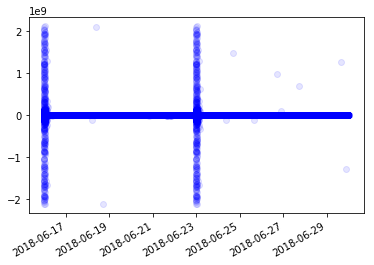

In [93]:
#Let's see if we can't get a visual on just how whacky we're talking
#What's up with the 16th and the 23rd -- are Saturdays really that much busier?
#Considering its showing +/- 1/4 of the earth's population, probably not

#Formatting for x-axis found here https://matplotlib.org/gallery/recipes/common_date_problems.html
fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.ENTRIES_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [94]:
#Based on the function from the lecture -- want to add an average instead of just 0

def count_cleaner(row, max_counter, column_name):
    counter = row[column_name]
    if abs(counter) > max_counter:
        #time = row['DATE_TIME'].time
        return 0
    elif counter < 0:
        counter = -counter
    return counter

#Picked 15000 as max since thats a bit over 1 person/sec, any more than that seems pretty unreasonable
df["EXITS_COUNT"] = df.apply(count_cleaner, axis=1, max_counter= 15000, column_name='EXITS_COUNT')
df['ENTRIES_COUNT'] = df.apply(count_cleaner, axis=1, max_counter = 15000, column_name='ENTRIES_COUNT')

df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT,DATE_TIME
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0,2018-06-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0,2018-06-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0,2018-06-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0,2018-06-23 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0,2018-06-23 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,00:00:00,REGULAR,6667980,2260145,161.0,33.0,2018-06-24 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,04:00:00,REGULAR,6667999,2260154,19.0,9.0,2018-06-24 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,08:00:00,REGULAR,6668012,2260170,13.0,16.0,2018-06-24 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,12:00:00,REGULAR,6668092,2260242,80.0,72.0,2018-06-24 12:00:00
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2018,16:00:00,REGULAR,6668269,2260281,177.0,39.0,2018-06-24 16:00:00


In [95]:
#Check it worked
(abs(df['ENTRIES_COUNT']) > 15000).value_counts()

False    393375
Name: ENTRIES_COUNT, dtype: int64

In [96]:
(abs(df['EXITS_COUNT']) > 15000).value_counts()

False    393375
Name: EXITS_COUNT, dtype: int64

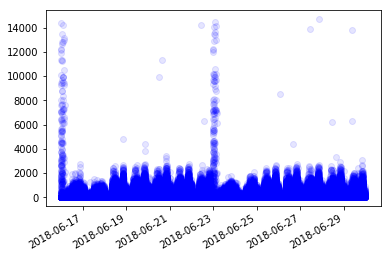

In [97]:
#Still pretty whacky though -- 
fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.ENTRIES_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

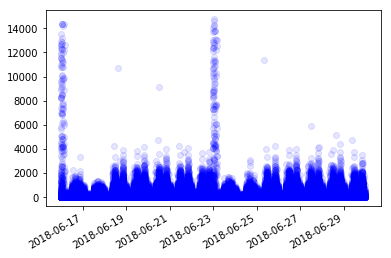

In [98]:
fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.EXITS_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [99]:
#Just from eyeballing looks like 5000 if a more reasonable filter from the peaks
#Some danger here with throwing out the stations we really need since we're tossing the highest counts
#But the days with the data we're dropping still have other points up there, so it may even out?
#This also will be helped if I can do get the function to replace with a median instead of 0s

df["EXITS_COUNT"] = df.apply(count_cleaner, axis=1, max_counter= 5000, column_name='EXITS_COUNT')
df['ENTRIES_COUNT'] = df.apply(count_cleaner, axis=1, max_counter = 5000, column_name='ENTRIES_COUNT')

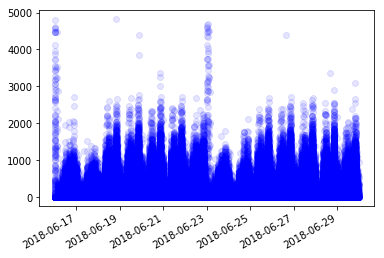

In [104]:
#Let's have a look
fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.ENTRIES_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

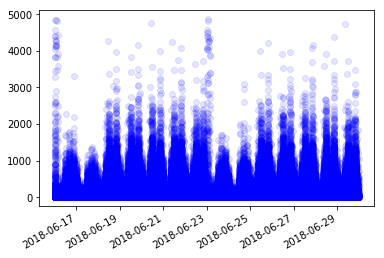

In [105]:
#These look a bit better -- might be that some of these outliers end up in our reccommendations but we can fine tune

fig, ax = plt.subplots()
ax.plot(df.DATE_TIME, df.EXITS_COUNT, 'bo', alpha=.1)

fig.autofmt_xdate()

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [100]:
#Now let's create total foot traffic as a measure -- people going in and out of the station are all gonna pass by

df['FTRAFFIC'] = df.EXITS_COUNT + df.ENTRIES_COUNT
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT,DATE_TIME,FTRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,23.0,8.0,2018-06-23 04:00:00,31.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,16.0,29.0,2018-06-23 08:00:00,45.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,116.0,68.0,2018-06-23 12:00:00,184.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,229.0,60.0,2018-06-23 16:00:00,289.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,20:00:00,REGULAR,6667819,2260112,285.0,46.0,2018-06-23 20:00:00,331.0


In [103]:
#So here's our top 10 by ID, gotta get groupby going still

df.sort_values('FTRAFFIC', ascending=False).head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRIES_COUNT,EXITS_COUNT,DATE_TIME,FTRAFFIC
122284,PTH22,R540,00-05-00,PATH NEW WTC,1,PTH,06/16/2018,01:32:48,REGULAR,30118,59585,2910.0,4150.0,2018-06-16 01:32:48,7060.0
122029,PTH22,R540,00-05-00,PATH NEW WTC,1,PTH,06/23/2018,01:32:48,REGULAR,30881,61081,2982.0,4036.0,2018-06-23 01:32:48,7018.0
171810,R415,R120,00-03-01,MORISN AV/SNDVW,6,IRT,06/18/2018,20:00:00,REGULAR,109,85,4817.0,1603.0,2018-06-18 20:00:00,6420.0
13958,B013,R196,01-05-01,PROSPECT PARK,BQS,BMT,06/23/2018,00:00:00,REGULAR,14,1808,4476.0,1808.0,2018-06-23 00:00:00,6284.0
13943,B013,R196,01-05-01,PROSPECT PARK,BQS,BMT,06/16/2018,00:00:00,REGULAR,14,1808,4466.0,1808.0,2018-06-16 00:00:00,6274.0
180857,R528,R097,00-06-02,JUNCTION BLVD,7,IRT,06/23/2018,00:00:00,REGULAR,3,2080,4128.0,2080.0,2018-06-23 00:00:00,6208.0
180944,R528,R097,00-06-02,JUNCTION BLVD,7,IRT,06/16/2018,00:00:00,REGULAR,3,2078,4120.0,2078.0,2018-06-16 00:00:00,6198.0
42351,N010,R126,00-05-01,175 ST,A,IND,06/23/2018,00:00:00,REGULAR,0,1467,4570.0,1467.0,2018-06-23 00:00:00,6037.0
42443,N010,R126,00-05-01,175 ST,A,IND,06/16/2018,00:00:00,REGULAR,0,1467,4561.0,1467.0,2018-06-16 00:00:00,6028.0
84164,N336,R158,00-05-01,KEW GARDENS,EF,IND,06/23/2018,02:30:00,REGULAR,4,1296,4486.0,1296.0,2018-06-23 02:30:00,5782.0
